#Support Vector Classifier

In [1]:
#import required libraries
import numpy as np
from tensorflow import keras
import pandas as pd
import math
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Description
#Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.
#'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [3]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#create a list of labels
classes=[]
for i in train_labels:
  if i not in classes:
    classes.append(i)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(classes)

[9, 0, 3, 2, 7, 5, 1, 6, 4, 8]


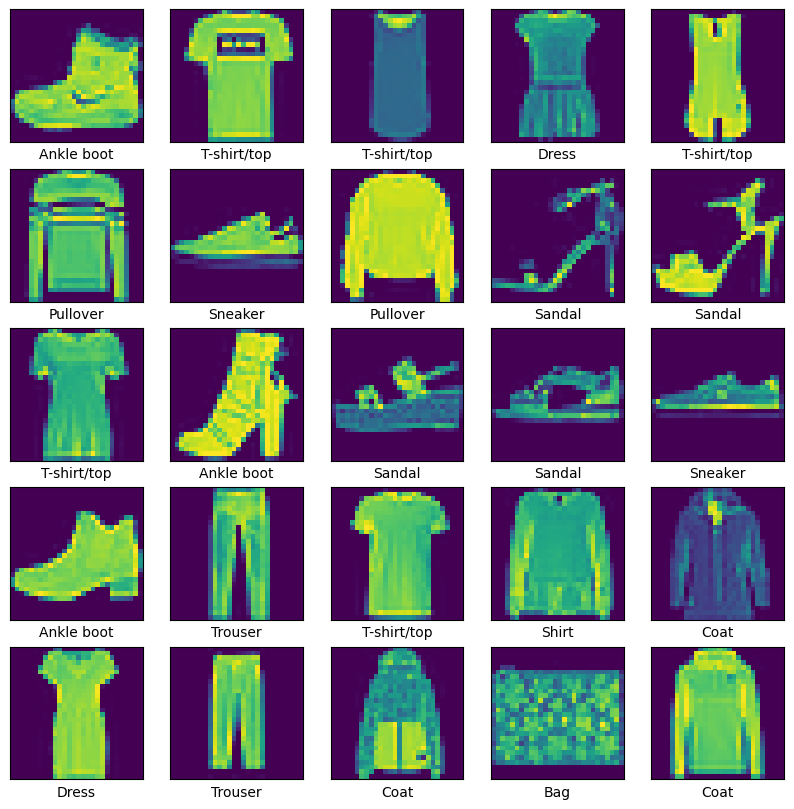

In [5]:
# Display sample images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


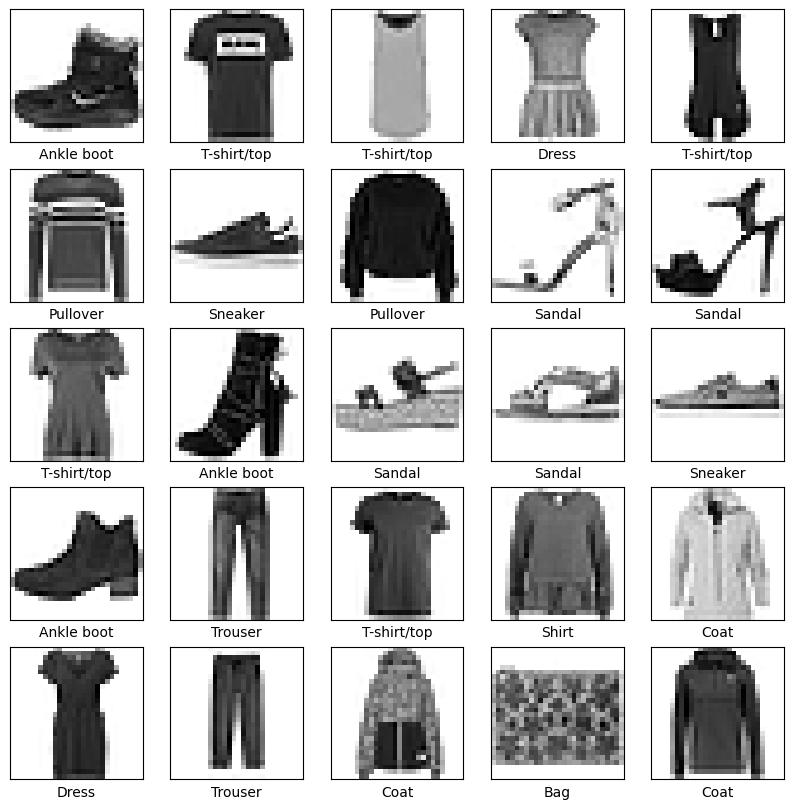

In [6]:
# Display sample images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


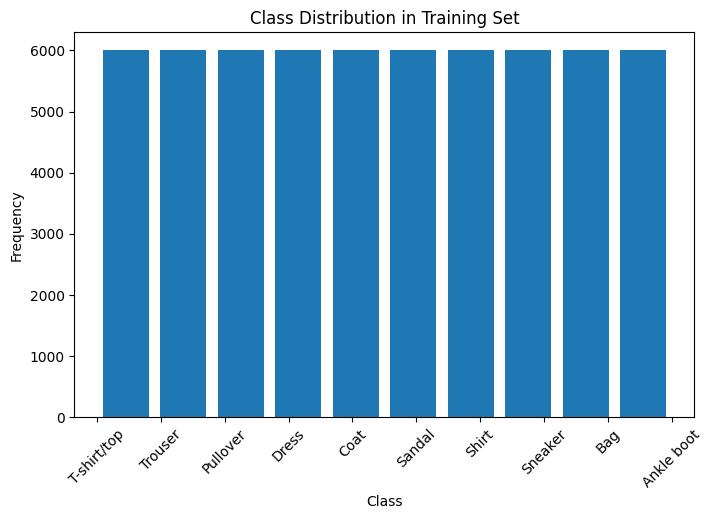

In [7]:
# Plot histogram for class distribution
plt.figure(figsize=(8,5))
plt.hist(train_labels, bins=len(classes), rwidth=0.8)
plt.xticks(range(len(classes)), class_names, rotation=45)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

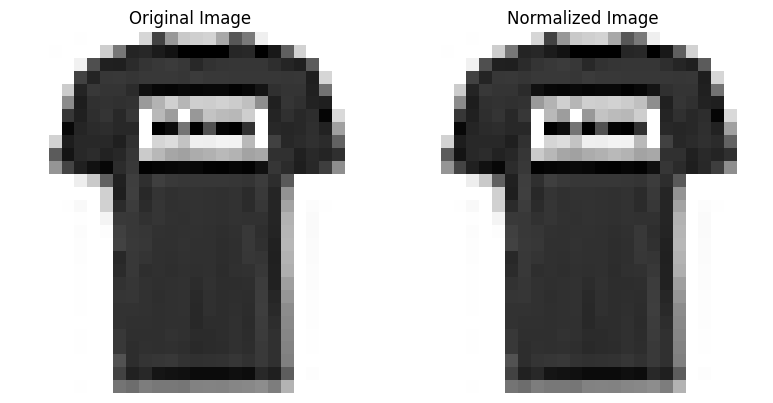

In [8]:
# normalized images
normalized_image = train_images[1] / 255.0  # Normalize pixel values to [0, 1]
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap=plt.cm.binary)
plt.title('Normalized Image')
plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Flatten the images
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

scaler = StandardScaler()
train_images_standardized = scaler.fit_transform(train_images_flattened.astype(np.float64))  # Convert to float64 to avoid overflow
test_images_standardized = scaler.transform(test_images_flattened.astype(np.float64))

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
train_images_pca = pca.fit_transform(train_images_standardized)
test_images_pca = pca.transform(test_images_standardized)

#Initial Model

In [13]:
# Create a Linear SVM classifier
svm_classifier = LinearSVC(random_state=42)

# Train the Linear SVM classifier
svm_classifier.fit(train_images_standardized, train_labels)

# Predict labels for validation data
predicted_labels_linear = svm_classifier.predict(test_images_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
# Calculate accuracy
accuracy_linear = accuracy_score(test_labels, predicted_labels_linear)
print(f'Validation accuracy: {accuracy_linear * 100:.2f}%')

Validation accuracy: 83.08%


[[789   4  17  45  11   1 114   3  15   1]
 [  2 949   6  27   8   0   5   1   2   0]
 [ 13   4 693  11 170   0  95   2  12   0]
 [ 37  17  23 816  61   0  38   3   5   0]
 [  1   3  78  25 820   0  62   1  10   0]
 [  2   1   1   0   0 908   1  44  13  30]
 [125   8 116  44 139   1 530   2  34   1]
 [  0   0   0   0   0  39   0 924   2  35]
 [  6   4   5  11   5   8  19   8 933   1]
 [  0   1   1   2   0  12   2  35   1 946]]


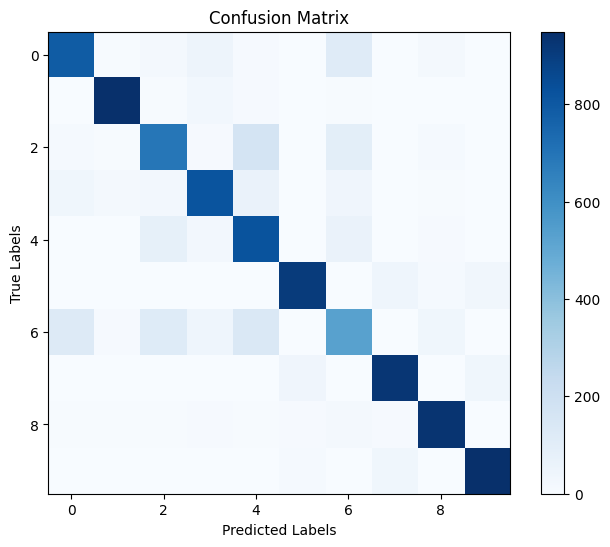

In [15]:
#Confusion Matrix

cm = confusion_matrix(test_labels, predicted_labels_linear)
print(cm)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
print("Classification Report:")
print(classification_report(test_labels, predicted_labels_linear))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.96      0.95      0.95      1000
           2       0.74      0.69      0.71      1000
           3       0.83      0.82      0.82      1000
           4       0.68      0.82      0.74      1000
           5       0.94      0.91      0.92      1000
           6       0.61      0.53      0.57      1000
           7       0.90      0.92      0.91      1000
           8       0.91      0.93      0.92      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [17]:
# Display misclassified examples
misclassified_idx = np.where(test_labels != predicted_labels_linear)[0]
print("Misclassified Examples:",len(misclassified_idx))

Misclassified Examples: 1692


#Applying Dimensionality Reduction

In [18]:
# Create a Linear SVM classifier with pca_images
svm_classifier_pca = LinearSVC(random_state=42)

# Train the Linear SVM classifier
svm_classifier_pca.fit(train_images_pca, train_labels)

# Predict labels for validation data
predicted_labels_pca = svm_classifier_pca.predict(test_images_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(test_labels, predicted_labels_pca)
print(f'Validation accuracy: {accuracy_pca * 100:.2f}%')

Validation accuracy: 81.69%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
print("Classification Report:")
print(classification_report(test_labels, predicted_labels_pca))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1000
           1       0.96      0.96      0.96      1000
           2       0.65      0.74      0.70      1000
           3       0.83      0.84      0.84      1000
           4       0.74      0.60      0.67      1000
           5       0.88      0.94      0.91      1000
           6       0.55      0.59      0.57      1000
           7       0.93      0.87      0.90      1000
           8       0.91      0.95      0.93      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [20]:
# Display misclassified examples
misclassified_idx = np.where(test_labels != predicted_labels_pca)[0]
print("Misclassified Examples:",len(misclassified_idx))

Misclassified Examples: 1831


#Fine Tuning with Non-Linear Kernels

##Polynomial Kernel

In [21]:
from sklearn.svm import SVC

svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(train_images_standardized, train_labels)

# Predict labels for validation data
predicted_labels_poly = svm_poly.predict(test_images_standardized)



In [22]:
# Calculate accuracy
accuracy_poly = accuracy_score(test_labels, predicted_labels_poly)
print(f'Test accuracy: {accuracy_poly * 100:.2f}%')

Test accuracy: 87.55%


In [23]:
# Generate and print classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels_poly))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.86      0.88      0.87      1000
           4       0.81      0.80      0.81      1000
           5       0.98      0.95      0.96      1000
           6       0.62      0.69      0.65      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



[[819   1   8  40   2   1 123   0   6   0]
 [  1 956   2  30   2   0   9   0   0   0]
 [ 17   0 768   9  92   0 113   0   1   0]
 [ 15   2   8 883  27   0  64   0   1   0]
 [  1   0  76  29 804   0  89   0   1   0]
 [  0   0   0   0   0 952   4  31   2  11]
 [116   3  89  29  60   0 690   0  13   0]
 [  0   0   0   0   0  12   0 967   0  21]
 [  4   0   4   7   4   2  14   4 961   0]
 [  0   0   0   0   0   7   2  36   0 955]]


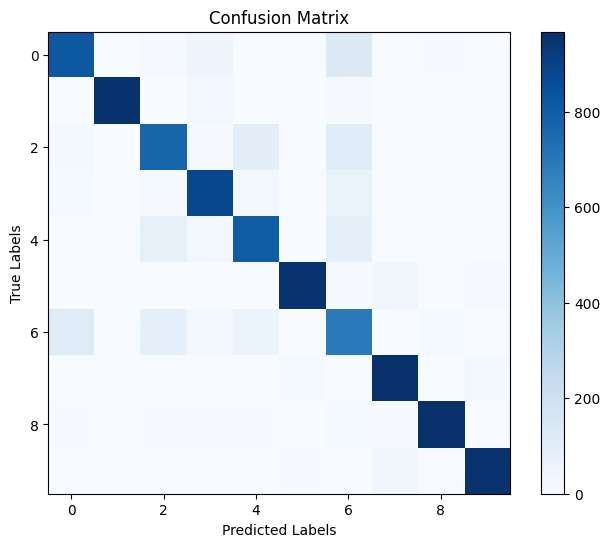

In [24]:
#Confusion Matrix

cm = confusion_matrix(test_labels, predicted_labels_poly)
print(cm)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
# Display misclassified examples
misclassified_idx = np.where(test_labels != predicted_labels_poly)[0]
print("Misclassified Examples:",len(misclassified_idx))

Misclassified Examples: 1245


##RBF Kernel

In [26]:
from sklearn.svm import SVC
svm_classifier_rbf = SVC(kernel='rbf', C=1.0)  # RBF kernel SVM
svm_classifier_rbf.fit(train_images_standardized, train_labels)

# Predict labels for validation data
predicted_labels_rbf = svm_classifier_rbf.predict(test_images_standardized)

# Calculate accuracy
accuracy_rbf = accuracy_score(test_labels, predicted_labels_rbf)
print(f'Validation accuracy: {accuracy_rbf * 100:.2f}%')

Validation accuracy: 88.36%


In [27]:
# Generate and print classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



[[856   0   9  29   3   1  90   0  12   0]
 [  4 961   3  25   3   0   4   0   0   0]
 [ 13   1 815  12  92   0  64   0   3   0]
 [ 28   3  12 893  31   0  29   0   4   0]
 [  0   0  84  30 821   0  61   0   4   0]
 [  0   0   0   1   0 958   0  26   2  13]
 [142   1  92  31  67   0 647   0  20   0]
 [  0   0   0   0   0  20   0 959   0  21]
 [  3   0   2   5   4   4   3   4 974   1]
 [  0   0   0   0   0   8   0  37   3 952]]


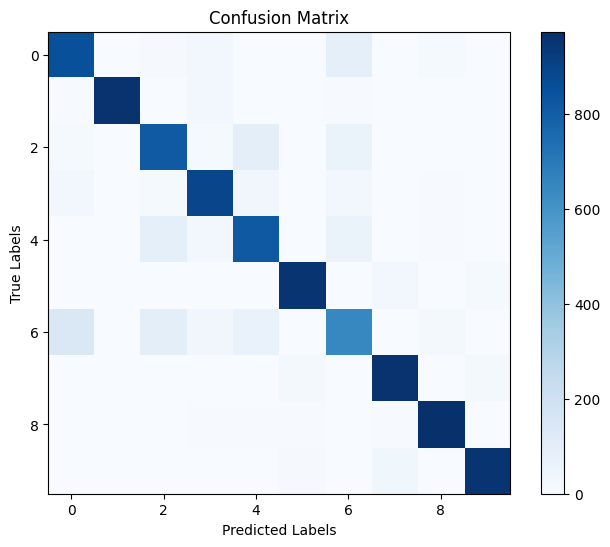

In [28]:
#Confusion Matrix

cm = confusion_matrix(test_labels, predicted_labels_rbf)
print(cm)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
# Display misclassified examples
misclassified_idx = np.where(test_labels != predicted_labels_rbf)[0]
print("Misclassified Examples:",len(misclassified_idx))

Misclassified Examples: 1164


#Visualizing the comparison of different models

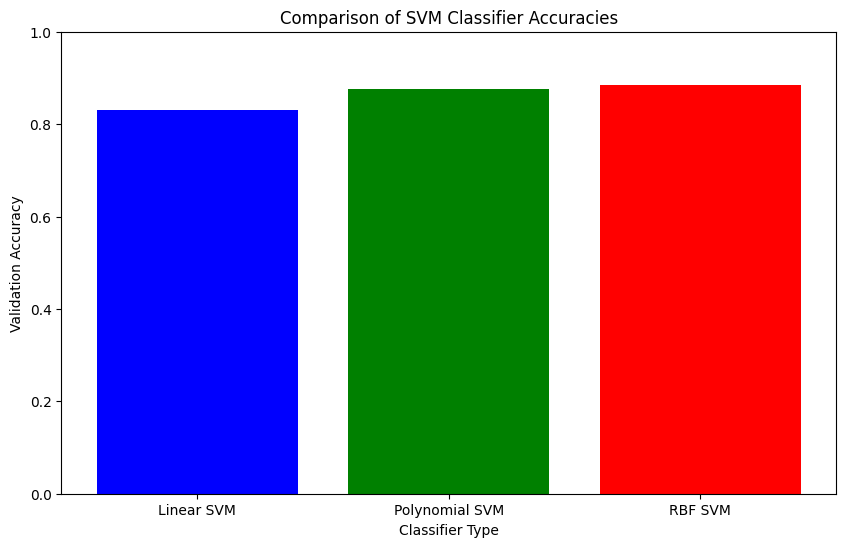

In [30]:
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf]
labels = ['Linear SVM', 'Polynomial SVM', 'RBF SVM']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifier Type')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of SVM Classifier Accuracies')
plt.ylim(0, 1)
plt.show()

In [31]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you already have your predictions, e.g., predicted_labels_linear, etc.

# Get reports as a dictionary
report_linear = classification_report(test_labels, predicted_labels_linear, output_dict=True)
report_pca = classification_report(test_labels, predicted_labels_pca, output_dict=True)
report_poly = classification_report(test_labels, predicted_labels_poly, output_dict=True)
report_rbf = classification_report(test_labels, predicted_labels_rbf, output_dict=True)

# Extracting weighted average scores for simplicity
metrics_linear = report_linear['weighted avg']
metrics_pca = report_pca['weighted avg']
metrics_poly = report_poly['weighted avg']
metrics_rbf = report_rbf['weighted avg']


In [32]:
import pandas as pd

# Create a DataFrame
data = {
    "Model": ["Linear SVM", "Linear SVM with PCA", "Polynomial SVM", "RBF SVM"],
    "Precision": [metrics_linear['precision'], metrics_pca['precision'], metrics_poly['precision'], metrics_rbf['precision']],
    "Recall": [metrics_linear['recall'], metrics_pca['recall'], metrics_poly['recall'], metrics_rbf['recall']],
    "F1-Score": [metrics_linear['f1-score'], metrics_pca['f1-score'], metrics_poly['f1-score'], metrics_rbf['f1-score']]
}

df_metrics = pd.DataFrame(data)
df_metrics.head()

,Model,Precision,Recall,F1-Score
0,Linear SVM,0.830503,0.8308,0.829512
1,Linear SVM with PCA,0.819588,0.8169,0.816828
2,Polynomial SVM,0.878573,0.8755,0.876694
3,RBF SVM,0.882850,0.8836,0.882894


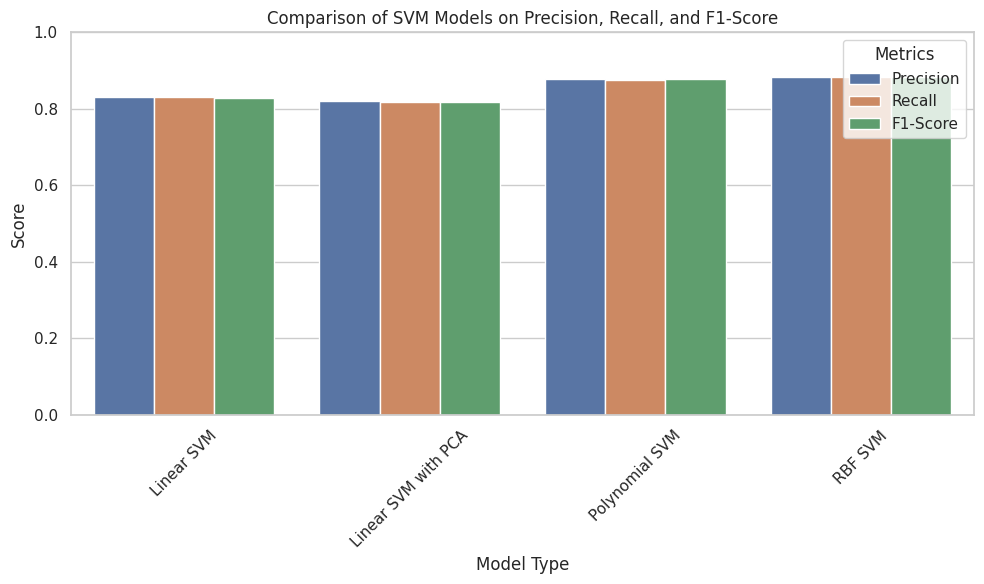

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Melt the DataFrame to suit Seaborn's needs for a grouped barplot
df_melted = df_metrics.melt('Model', var_name='Metrics', value_name='Values')

# Create a barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Values', hue='Metrics', data=df_melted)
plt.title('Comparison of SVM Models on Precision, Recall, and F1-Score')
plt.xlabel('Model Type')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#RBF Kernel with other parameter tuning

In [13]:
from sklearn.svm import SVC
svm_classifier_rbf_2 = SVC(kernel='rbf', C=0.1, degree=5, gamma='auto', shrinking=True, max_iter=-1)
svm_classifier_rbf_2.fit(train_images_standardized, train_labels)

# Predict labels for validation data
predicted_labels_rbf_2 = svm_classifier_rbf_2.predict(test_images_standardized)

# Calculate accuracy
accuracy_rbf_2 = accuracy_score(test_labels, predicted_labels_rbf_2)
print(f'Validation accuracy: {accuracy_rbf_2 * 100:.2f}%')

Validation accuracy: 84.75%
